Proyecto Individual 1: ML Ops/EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Analizar el dataset
df_eda = pd.read_csv('/Users/florencialuppi/Desktop/DS/P1/Dataset/movies_dataset_transformed.csv')

In [5]:
df_eda.head(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,...,vote_count,collection_unique,genre_unique,prod_countries,prod_companies_id,prod_companies_name,release_year,return,id.1,director
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,5415.0,Toy Story Collection,Animation,United States of America,3.0,Pixar Animation Studios,1995.0,12.451801,862,John Lasseter
1,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,5415.0,Toy Story Collection,Comedy,United States of America,3.0,Pixar Animation Studios,1995.0,12.451801,8844,Joe Johnston
2,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,5415.0,Toy Story Collection,Family,United States of America,3.0,Pixar Animation Studios,1995.0,12.451801,15602,Howard Deutch


In [7]:
#Analizar columnas y data types
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45473 entries, 0 to 45472
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   budget               45473 non-null  float64
 1   id                   45473 non-null  int64  
 2   original_language    45472 non-null  object 
 3   overview             45284 non-null  object 
 4   popularity           45470 non-null  float64
 5   release_date         45452 non-null  object 
 6   revenue              45473 non-null  float64
 7   runtime              45438 non-null  float64
 8   spoken_languages     45470 non-null  object 
 9   status               45443 non-null  object 
 10  tagline              28679 non-null  object 
 11  title                45470 non-null  object 
 12  vote_average         45470 non-null  float64
 13  vote_count           45470 non-null  float64
 14  collection_unique    6084 non-null   object 
 15  genre_unique         45003 non-null 

In [8]:
#Identificamos el tamano en filas y columnas
df_eda.shape

(45473, 23)

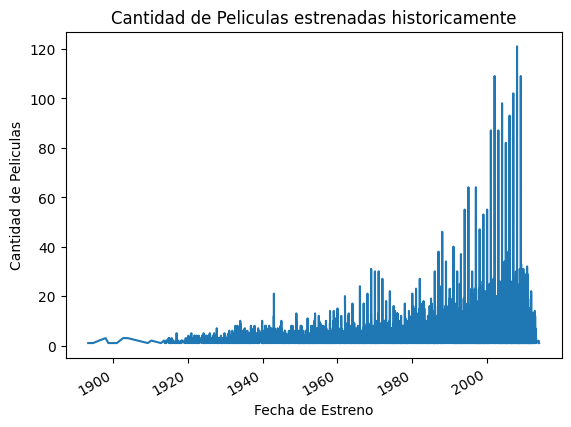

In [27]:
# Grafico de lineas- Cantidad de Peliculas estrenadas historicamente
df_eda['release_date'] = pd.to_datetime(df_eda['release_date'])
df_eda['release_date'].value_counts().sort_index().plot.line()
plt.title('Cantidad de Peliculas estrenadas historicamente')
plt.xlabel('Fecha de Estreno')
plt.ylabel('Cantidad de Peliculas')
plt.show()


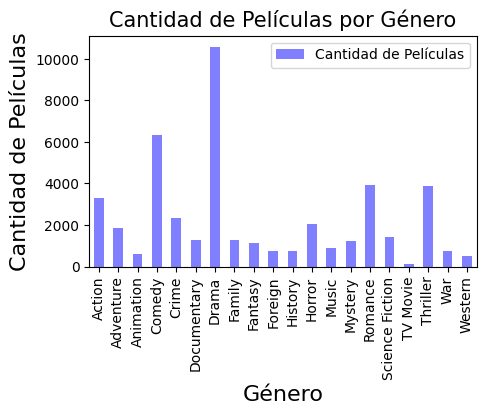

In [28]:
#Graficar peliculas por genero
df_eda['genre_unique'].value_counts().sort_index().plot(kind='bar', figsize=(5, 3), color='blue', alpha=0.5)

plt.title('Cantidad de Películas por Género', fontsize=15)
plt.xlabel('Género', fontsize=16)
plt.ylabel('Cantidad de Películas', fontsize=16)
plt.legend(['Cantidad de Películas'])

plt.show()

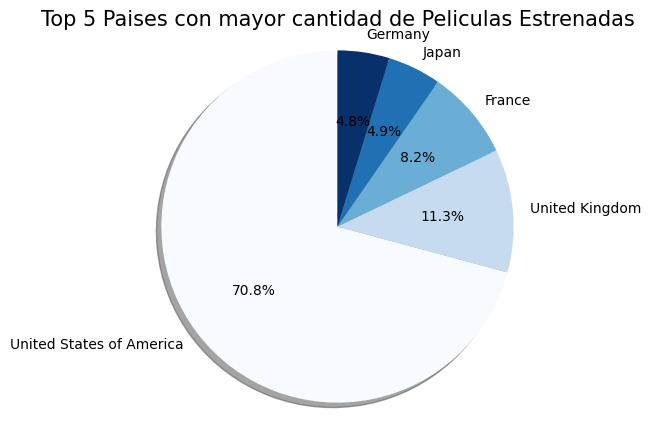

In [35]:
#Graficar pie top 5 paises con mayor cantidad de peliculas estrenadas
df_eda['prod_countries'].value_counts().head(5).plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', shadow=True, startangle=90, cmap='Blues')
plt.title('Top 5 Paises con mayor cantidad de Peliculas Estrenadas', fontsize=15)
plt.axis('equal')
plt.ylabel('')
plt.show()


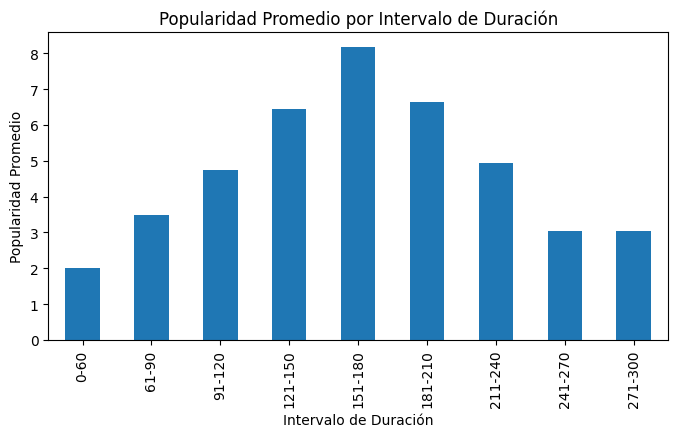

In [42]:
#Tendencia popularidad y Runtime(intervalos de duracion)

# Dividir la duración en intervalos
bins = [0, 60, 90, 120, 150, 180, 210, 240, 270, 300]
labels = ['0-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300']
df_eda['duration_interval'] = pd.cut(df_eda['runtime'], bins=bins, labels=labels)

# Calcular la popularidad promedio por intervalo de duración
avg_popularity = df_eda.groupby('duration_interval')['popularity'].mean()

#  gráfico de barras
plt.figure(figsize=(8, 4))
avg_popularity.plot(kind='bar')
plt.title('Popularidad Promedio por Intervalo de Duración')
plt.xlabel('Intervalo de Duración')
plt.ylabel('Popularidad Promedio')
plt.show()


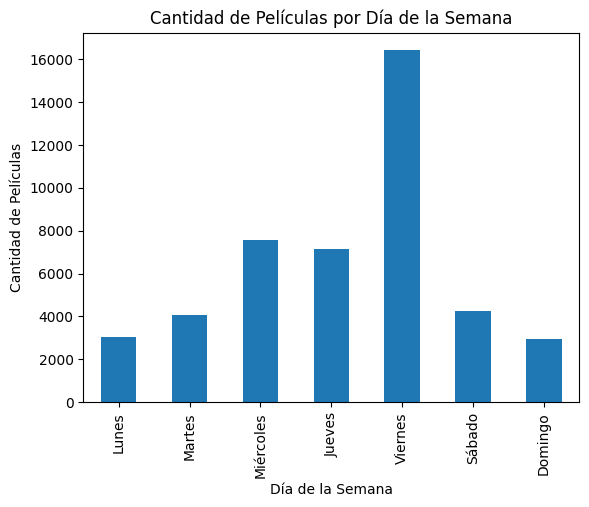

In [51]:
#Canrtidad de peliculas por dia de la semana

#Convertir la columna de fecha en formato de fecha
df_eda['release_date'] = pd.to_datetime(df_eda['release_date'])

#Obtener el día de la semana correspondiente a cada fecha
df_eda['dia_semana'] = df_eda['release_date'].dt.dayofweek

#Contar la frecuencia de cada día de la semana
dias_semana_count = df_eda['dia_semana'].value_counts()

#Ordenar los días de la semana en orden ascendente
dias_semana_count = dias_semana_count.sort_index()

#Crear una lista de nombres de los días de la semana
nombres_dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

#Graficar el resultado con barras
dias_semana_count.plot(kind='bar')

# Personalizar el gráfico
plt.title('Cantidad de Películas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Películas')
plt.xticks(range(len(nombres_dias_semana)), nombres_dias_semana)

# Mostrar el gráfico
plt.show()



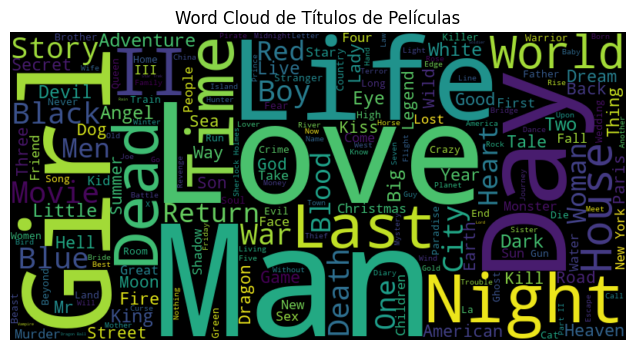

In [48]:
#Wordcloud de los titulos de las peliculas
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Convertir los títulos a cadenas de texto
df_eda['title'] = df_eda['title'].astype(str)

# Unir todos los títulos en una sola cadena de texto
text = ' '.join(df_eda['title'])

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Mostrar el WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Títulos de Películas')
plt.show()

Conclusiones del EDA para el equipo de marketing (Consumo Cultural):

Tendencia de popularidad y duración de películas: Se observa una alta popularidad en películas con una duración en el rango de 150 a 180 minutos. 

Meses con mayor cantidad de estrenos: Septiembre y Enero

Distribución de películas por país: Estados Unidos lidera con un 70% de las películas estrenadas, seguido de países occidentales. También se destaca la presencia de Japón como el único país oriental en el top 5. 

Géneros populares: El género de drama y comedia son los más representados en la muestra de películas. Esto puede ser útil para el equipo de marketing al seleccionar películas para promocionar y alinearse con las preferencias del público objetivo.

Crecimiento de la producción de películas: A partir de 2010, se observa un notable aumento en la producción de películas, cuadriplicando la cantidad estrenada en años anteriores. 